In [263]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [264]:
ticker = "BTC-USD"
period = "2y"
interval = "1wk"
coeff = {"1m":1/24/60, "2m":1/24/30, "5m":1/24/12, "15m":1/24/4, "30m":1/24/2,
        "60m":1/24, "90m":1/16, "1h":1/24, "1d":1, "5d":5, "1wk":7, "1mo":30,
         "3mo":90}
data = yf.download(ticker, period=period, interval=interval)

[*********************100%***********************]  1 of 1 completed


In [265]:
def candles(ax, data, alpha=1):
    up = data[data.Close >= data.Open]
    down = data[data.Close < data.Open]
    col_up = 'green'
    col_down = 'red'
    col_shadow_up = 'black'
    col_shadow_down = 'black'
    width_body = (data.index[-1]-data.index[-2])*.8
    width_shadow = (data.index[-1]-data.index[-2])*.2
    width_body = .8 * coeff[interval]
    width_shadow = .2 * coeff[interval]
    ax.bar(up.index, up.Close-up.Open, width_body, bottom=up.Open, color=col_up, alpha=alpha)
    ax.bar(up.index, up.High-up.Close, width_shadow, bottom=up.Close, color=col_shadow_up, alpha=alpha)
    ax.bar(up.index, up.Low-up.Open, width_shadow, bottom=up.Open, color=col_shadow_up, alpha=alpha)
    ax.bar(down.index, down.Close-down.Open, width_body, bottom=down.Open, color=col_down, alpha=alpha)
    ax.bar(down.index, down.High-down.Open, width_shadow, bottom=down.Open, color=col_shadow_down, alpha=alpha)
    ax.bar(down.index, down.Low-down.Close, width_shadow, bottom=down.Close, color=col_shadow_down, alpha=alpha)

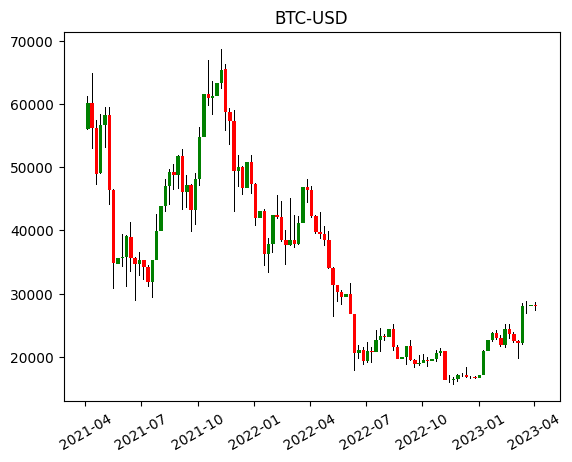

In [266]:
# Исходные данные
fig = plt.figure()
ax = fig.add_subplot()
candles(ax, data)
plt.title(ticker)
plt.xticks(rotation=30)
plt.show()

In [267]:
# Находим экстремумы
n = 5
resistance_points = scipy.signal.argrelextrema(data["High"].to_numpy(), np.greater, axis=0, order=n)
support_points = scipy.signal.argrelextrema(data["Low"].to_numpy(), np.less, axis=0, order=n)
resistance_points = data.iloc[resistance_points]
support_points = data.iloc[support_points]

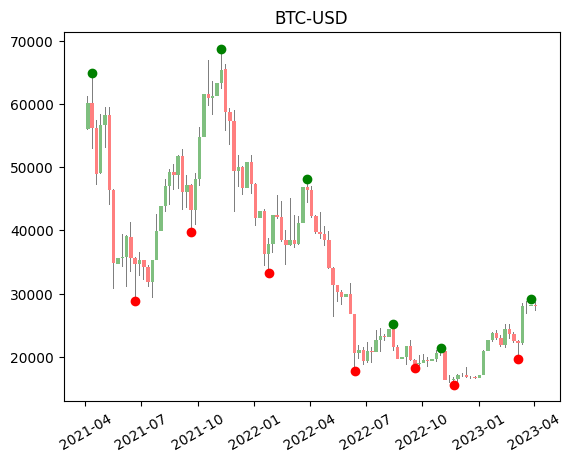

In [268]:
fig = plt.figure()
ax = fig.add_subplot()
candles(ax, data, 0.5)
ax.scatter(resistance_points.index, resistance_points["High"], color="green")
ax.scatter(support_points.index, support_points["Low"], color="red")
plt.title(ticker)
plt.xticks(rotation=30)
plt.show()

In [269]:
# Ищем уровни, проходящие сразу через несколько экстремумов
to_check = []
for point in resistance_points["High"]:
    to_check.append(point)
for point in support_points["Low"]:
    to_check.append(point)
to_check.sort()

epsilon = 0.01

levels = []
streak = 1
y_range = data["High"].max()-data["Low"].min()
for i in range(1, len(to_check)):
    if to_check[i] - to_check[i-1] < to_check[i-1] * epsilon and to_check[i] - to_check[i-1] < y_range * epsilon:
        streak += 1
    else:
        if streak > 1:
            levels.append(sum(to_check[i-streak:i])/streak)
        streak = 1
if streak > 1:
    levels.append(sum(to_check[-streak:])/streak)

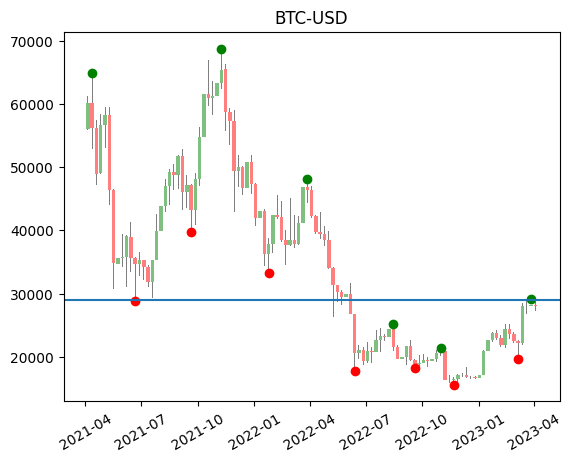

In [270]:
fig = plt.figure()
ax = fig.add_subplot()
candles(ax, data, 0.5)
ax.scatter(resistance_points.index, resistance_points["High"], color="green")
ax.scatter(support_points.index, support_points["Low"], color="red")
for lvl in levels:
    ax.axhline(lvl)
plt.title(ticker)
plt.xticks(rotation=30)
plt.show()

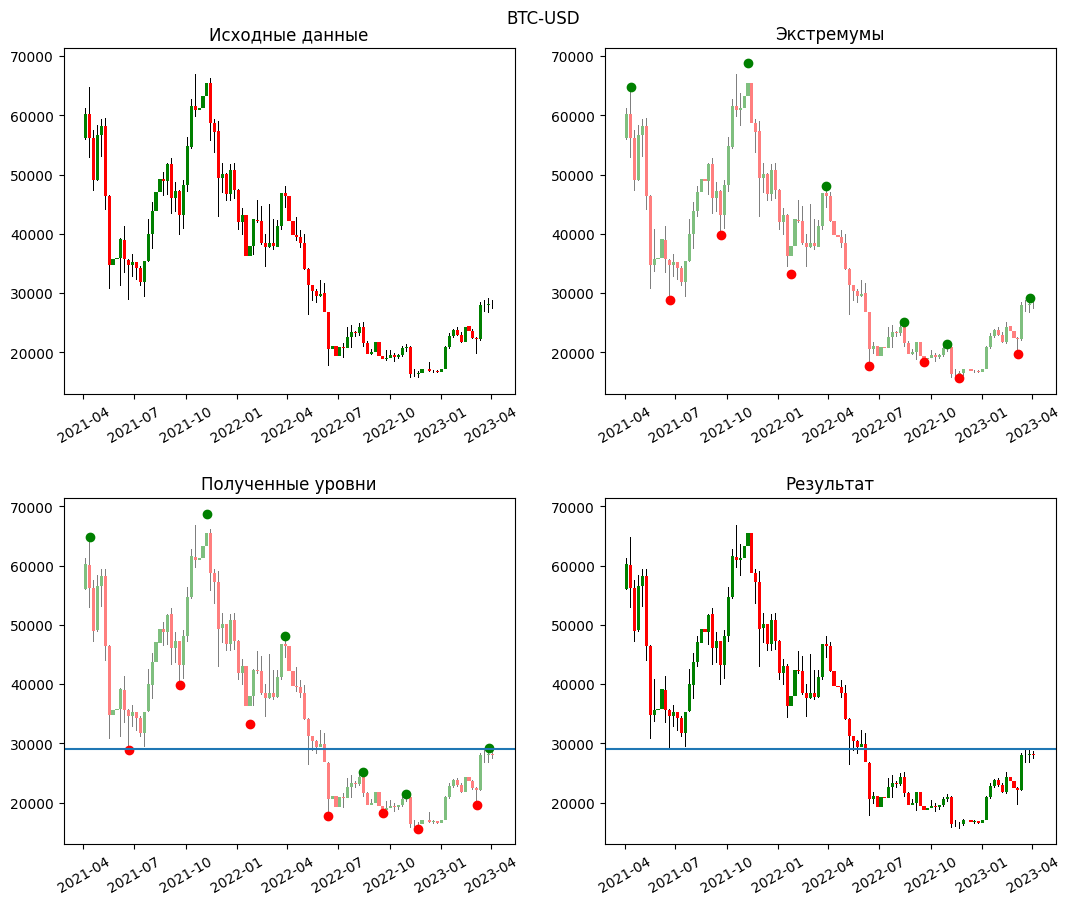

In [271]:
fig = plt.figure(figsize=[12.8, 9.6])

ax1 = fig.add_subplot(221)
candles(ax1, data)
ax1.set_title("Исходные данные")

ax2 = fig.add_subplot(222)
candles(ax2, data, 0.5)
ax2.scatter(resistance_points.index, resistance_points["High"], color="green")
ax2.scatter(support_points.index, support_points["Low"], color="red")
ax2.set_title("Экстремумы")

ax3 = fig.add_subplot(223)
candles(ax3, data, 0.5)
ax3.scatter(resistance_points.index, resistance_points["High"], color="green")
ax3.scatter(support_points.index, support_points["Low"], color="red")
for lvl in levels:
    ax3.axhline(lvl)
ax3.set_title("Полученные уровни")

ax4 = fig.add_subplot(224)
candles(ax4, data)
for lvl in levels:
    ax4.axhline(lvl)
ax4.set_title("Результат")

fig.suptitle(ticker)
fig.subplots_adjust(top=0.94, hspace=0.3)
for ax in fig.axes:
    plt.setp(ax.get_xticklabels(), rotation=30)
plt.show()

Источники  
https://towardsdatascience.com/detection-of-price-support-and-resistance-levels-in-python-baedc44c34c9  
https://python.plainenglish.io/estimate-support-and-resistance-of-a-stock-with-python-beginner-algorithm-f1ae1508b66d  
https://github.com/day0market/support_resistance  
https://tradingmathematically.com/how-to-algorithmically-identify-support-and-resistance  
https://www.quanttrader.com/index.php/detecting-support-and-resistance-levels/KahlerPhilipp2020  
https://stackoverflow.com/questions/8587047/support-resistance-algorithm-technical-analysis